**EXPLORATORY DATA ANALYSIS**

In [ ]:
# Importing Libraries
import ast         # Abstract Syntax Trees
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

**Filtering Data Analyst Roles in France**

In [4]:
df_DA_FR = df[(df['job_country'] == 'France') & (df['job_title_short'] == 'Data Analyst')]
df_DA_FR

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
67,Data Analyst,Stage - Data Analyste Finance H/F,"Paris, France",via Emplois Trabajo.org,Full-time and Internship,False,France,2023-11-07 13:37:53,False,False,France,None,NaN,NaN,Kepler Cheuvreux,[excel],{'analyst_tools': ['excel']}
252,Data Analyst,Analyste de données (Power BI),France,via LinkedIn,Full-time,False,France,2023-11-14 13:37:40,False,False,France,None,NaN,NaN,PRO ADVICE,"[sql, power bi, dax]","{'analyst_tools': ['power bi', 'dax'], 'progra..."
466,Data Analyst,Data Analyst / Data Steward H/F,"Île-de-France, France",via Jobijoba,Full-time,False,France,2023-07-25 13:31:21,False,False,France,None,NaN,NaN,Air France,"[sas, sas, python]","{'analyst_tools': ['sas'], 'programming': ['sa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784785,Data Analyst,[CDI] CRM Data Analyst,France,via Emplois Trabajo.org,Full-time,False,France,2023-07-31 06:52:11,True,False,France,None,NaN,NaN,e-Works,None,None
785074,Data Analyst,Stage - Data Analyst F/H,"Bois-Colombes, France",via WIZBII,Internship,False,France,2023-01-03 06:32:55,True,False,France,None,NaN,NaN,Stage,None,None
785094,Data Analyst,Data Analyst,"Cluses, France",via BeBee,Full-time,False,France,2023-01-28 06:14:02,False,False,France,None,NaN,NaN,Somfy,None,None
785478,Data Analyst,Business Data Analyst H/F,"Aix-en-Provence, France",via BeBee,Full-time,False,France,2023-01-03 06:33:04,False,False,France,None,NaN,NaN,Adsearch,"[sql, python]","{'programming': ['sql', 'python']}"


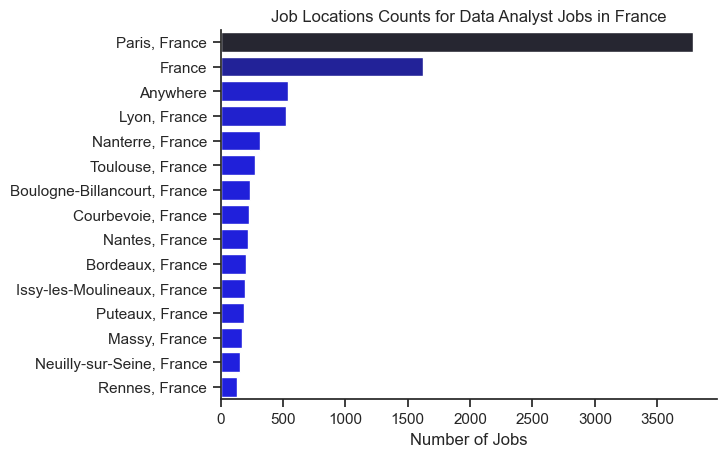

In [21]:
df_plot = df_DA_FR['job_location'].value_counts().head(15).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:blue_r', legend=False)
sns.despine()
plt.title('Job Locations Counts for Data Analyst Jobs in France')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

**Job Benefits and Conditions**

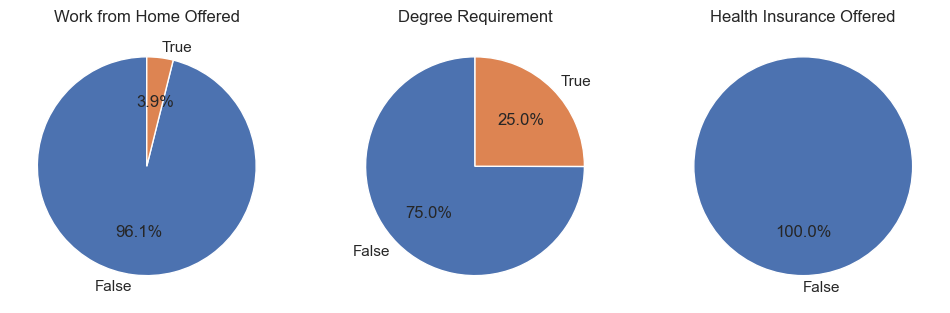

In [22]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    values = df_DA_FR[column].value_counts()
    labels = values.index.tolist()  # Dynamically generate labels from the unique values
    ax[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

**Top Hiring Companies**

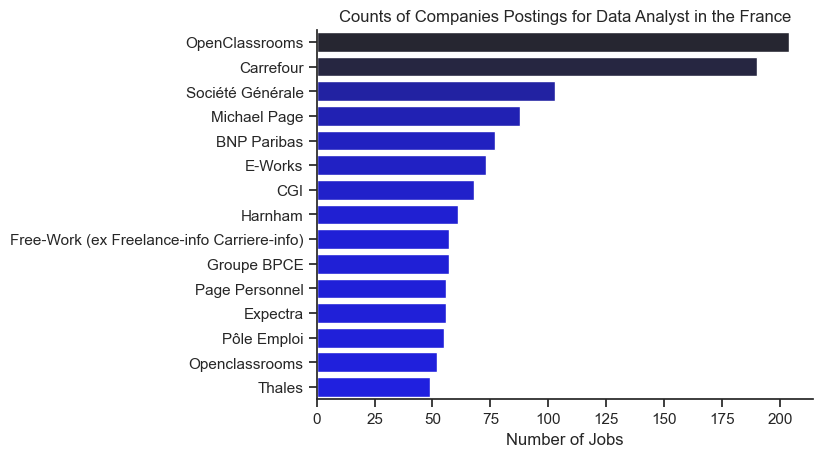

In [25]:
df_plot = df_DA_FR['company_name'].value_counts().head(15).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:blue_r', legend=False)
sns.despine()
plt.title('Counts of Companies Postings for Data Analyst in the France')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()